# Preprocessing
### Fetching the data

In [2]:
import numpy as np

def fetch_data(path, encoding="utf-8"):
    X = []
    y = []
    with open(path, encoding=encoding) as file:
        for line in file:
            data_string = line.rstrip().split(",")
            X.append(np.array(data_string[:-1], dtype=float))
            y.append(int(data_string[-1]))
    return np.array(X), np.array(y)

X_train, y_train = fetch_data("VSTrain.dt")
X_test, y_test = fetch_data("VSTest.dt")

N = len(y_train)

### Frequencies of classes

In [3]:
counts = np.unique(y_train, return_counts=True)

size = {}
classes = []
for class_, count in zip(counts[0], counts[1]):
    if count >= 65:
        size[class_] = count
        classes.append(class_)
        
    freq = count / N
    print(f"Class: {class_:2}  |  Total: {count:2}  |  Frequency: {freq:f}  |  Percentage: {freq*100:9f} %")
    
classes = np.array(classes)

Class:  0  |  Total: 68  |  Frequency: 0.088197  |  Percentage:  8.819715 %
Class:  1  |  Total: 22  |  Frequency: 0.028534  |  Percentage:  2.853437 %
Class:  2  |  Total:  1  |  Frequency: 0.001297  |  Percentage:  0.129702 %
Class:  3  |  Total: 96  |  Frequency: 0.124514  |  Percentage: 12.451362 %
Class:  4  |  Total: 17  |  Frequency: 0.022049  |  Percentage:  2.204929 %
Class:  5  |  Total: 50  |  Frequency: 0.064851  |  Percentage:  6.485084 %
Class:  6  |  Total: 60  |  Frequency: 0.077821  |  Percentage:  7.782101 %
Class:  7  |  Total: 10  |  Frequency: 0.012970  |  Percentage:  1.297017 %
Class:  8  |  Total: 27  |  Frequency: 0.035019  |  Percentage:  3.501946 %
Class:  9  |  Total: 58  |  Frequency: 0.075227  |  Percentage:  7.522698 %
Class: 10  |  Total:  9  |  Frequency: 0.011673  |  Percentage:  1.167315 %
Class: 11  |  Total: 21  |  Frequency: 0.027237  |  Percentage:  2.723735 %
Class: 12  |  Total: 19  |  Frequency: 0.024643  |  Percentage:  2.464332 %
Class: 13  |

### Data removal (classes below 65 samples)

In [4]:
train_indices = [idx for idx, y in enumerate(y_train) if y not in classes]
test_indices = [idx for idx, y in enumerate(y_test) if y not in classes]
        
X_train, y_train = np.delete(X_train, train_indices, axis=0), np.delete(y_train, train_indices)
X_test, y_test = np.delete(X_test, test_indices, axis=0), np.delete(y_test, test_indices)

print(f"Training samples: {len(y_train)}\nTest samples: {len(y_test)}")

Training samples: 314
Test samples: 335


### Normalization of data

In [5]:
def normalize(data, mu, var):
    return (data - mu)/var

X_train_mu = X_train.mean(axis=0)
X_train_std = X_train.std(axis=0)

X_train_norm = normalize(X_train, X_train_mu, X_train_std)
X_test_norm = normalize(X_test, X_train_mu, X_train_std)

# Principal component analysis

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
components = pca.fit_transform(X_train_norm)


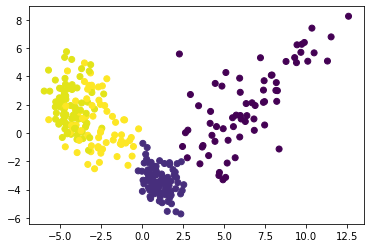

In [7]:
import matplotlib.pyplot as plt

data = {
    0  : [],
    3  : [],
    22 : [],
    23 : []
}

label_dict = {
    0  : 'Mira',
    3  : 'Classical Cep',
    22 : 'Beta Persei',
    23 : 'Beta Lyrae'
}

c_dict = {
    0  : 'r',
    3  : 'g',
    22 : 'b',
    23 : 'c'
}

for x, y in zip(components, y_train):
    data[y].extend(x)

y_unique = np.unique(y_train)

for y in y_unique:
    X = np.array(data[y]).reshape(size[y], 2)
    plt.scatter(X[:,0], X[:,1], c=c_dict[y], label=label_dict[y])

plt.title("PCA scatter plot")
plt.legend()
plt.grid()